In [1]:
import Pkg
Pkg.activate("../../../FinancialPlanner")

  Activating project at `c:\Users\matsz\programowanie\Optymalizacja_portfela\FinancialPlanner`


In [2]:
using Revise
using LinearAlgebra
using Distributions
using Random
using StatsPlots
using PDMats
using StatsBase
using Base.Iterators
using DataFrames, TimeSeries, XLSX
using PrettyTables

In [3]:
includet("../VARs/utils.jl")
includet("../VARs/VAR_OLS.jl")

In [92]:
df = DataFrame(XLSX.readtable("../../data/usa_macro_data.xlsx", "Quarterly", infer_eltypes=true))
data_source = collapse(TimeArray(df; timestamp = :observation_date), Dates.year, first)

display(returns_summarystats(data_source, 1)) 

,std,max,mean,p75th,min,skewness,p25th,autocor,kurtosis,sr,median
A939RX0Q048SBEA,15078.0,67981.0,39458.2,53692.0,17636.0,0.1715,26286.5,0.9585,-1.2503,2.6169,38905.0
GDPDEF,33.2392,124.163,55.5963,83.761,13.42,0.2226,20.5978,0.9569,-1.2157,1.6726,55.2795
TB3MS,3.169,14.39,4.1599,5.705,0.03,0.9892,1.75,0.8736,1.2373,1.3127,3.89
GS10,2.8998,14.29,5.4985,7.3125,1.32,0.9367,3.445,0.9292,0.5291,1.8961,4.725
Price_10Y,1696.97,5318.51,1572.47,2695.96,103.357,0.8485,165.936,0.9684,-0.7847,0.9266,695.429
Stock_Price,1144.93,5011.96,854.949,1283.92,24.84,1.8757,92.205,0.8853,3.1229,0.7467,287.45
Dividend,18.0439,70.6511,16.4021,22.2008,1.4167,1.5142,3.1125,0.9253,1.3575,0.909,9.4
E,46.9804,197.883,39.1208,55.4942,2.4567,1.6771,5.735,0.8617,2.3112,0.8327,16.3017
CAPE,8.1611,42.1856,20.7752,26.3734,7.1818,0.4615,15.1749,0.8962,-0.3087,2.5456,20.4852


nothing

In [49]:
freq = 1

cpi = percentchange(data_source[:GDPDEF], :log) .* 100
gdp = percentchange(data_source[:A939RX0Q048SBEA], :log) .* 100
sr = log1p.(data_source[:TB3MS] ./ freq) .- cpi
term = log1p.(data_source[:GS10] ./ freq) .- log1p.(data_source[:TB3MS] ./ freq)
Δd = round.(percentchange(data_source[:Dividend], :log) .* 100, digits=2) .- cpi

dy = round.((log.(data_source[:Dividend]) .- log.(data_source[:Stock_Price])), digits=2)

data= merge(gdp, cpi, sr, term, Δd, dy)

start = Date(1985, 01,01)
end_d = Date(2024, 12, 31)
s_data = to(from(data, start),end_d)

display(returns_summarystats(s_data, freq)) 
display(cor(values(s_data)))



,std,max,mean,p75th,min,skewness,p25th,autocor,kurtosis,sr,median
A939RX0Q048SBEA,1.54,3.58,1.7246,3.0028,-4.1876,-1.6545,0.981,0.3009,4.3411,1.1199,1.7824
GDPDEF,1.1531,6.7639,2.3429,2.5714,0.5552,1.7489,1.8625,0.5675,4.2844,2.0318,2.0163
TB3MS_GDPDEF,1.1662,0.6921,-1.1457,-0.5314,-6.4938,-2.4802,-1.5679,0.5524,9.4386,-0.9824,-1.0348
GS10_TB3MS,0.4446,1.4474,0.4797,0.8105,-0.1912,0.5215,0.1154,0.6948,-0.8126,1.0789,0.3611
Dividend_GDPDEF,6.3915,14.4243,3.3838,7.4514,-23.0452,-1.6696,0.7085,0.4432,5.5506,0.5294,3.648
Dividend_Stock_Price,0.3321,-3.17,-3.8705,-3.5925,-4.42,0.3718,-4.1,0.7846,-0.8387,-11.6556,-3.925


nothing

6×6 Matrix{Float64}:
  1.0          0.186541    0.00626509  -0.264304      0.163217   -0.180486
  0.186541     1.0        -0.785958    -0.333507      0.108673    0.0916719
  0.00626509  -0.785958    1.0         -0.231573     -0.090758    0.0984599
 -0.264304    -0.333507   -0.231573     1.0          -0.180701   -0.000345852
  0.163217     0.108673   -0.090758    -0.180701      1.0         0.0636524
 -0.180486     0.0916719   0.0984599   -0.000345852   0.0636524   1.0

In [50]:
s_data

40×6 TimeArray{Float64, 2, Date, Matrix{Float64}} 1985-01-01 to 2024-01-01
┌────────────┬─────────────────┬──────────┬──────────────┬────────────┬─────────
│            │ A939RX0Q048SBEA │ GDPDEF   │ TB3MS_GDPDEF │ GS10_TB3MS │ Divide ⋯
├────────────┼─────────────────┼──────────┼──────────────┼────────────┼─────────
│ 1985-01-01 │         3.57999 │  3.46524 │     -1.24821 │   0.315081 │        ⋯
│ 1986-01-01 │         3.14693 │  2.29697 │    -0.230103 │   0.190725 │        ⋯
│ 1987-01-01 │         1.78246 │  1.96793 │   -0.0899947 │   0.224977 │        ⋯
│ 1988-01-01 │           3.251 │  3.01971 │     -1.11462 │   0.337747 │        ⋯
│ 1989-01-01 │         3.30513 │   4.0545 │     -1.79901 │  0.0678741 │        ⋯
│ 1990-01-01 │         1.78235 │  3.57025 │     -1.40006 │  0.0726392 │        ⋯
│ 1991-01-01 │        -2.28046 │  3.68325 │     -1.73449 │   0.250681 │        ⋯
│ 1992-01-01 │         1.50942 │  2.47236 │    -0.885166 │   0.529063 │        ⋯
│     ⋮      │        ⋮        │  

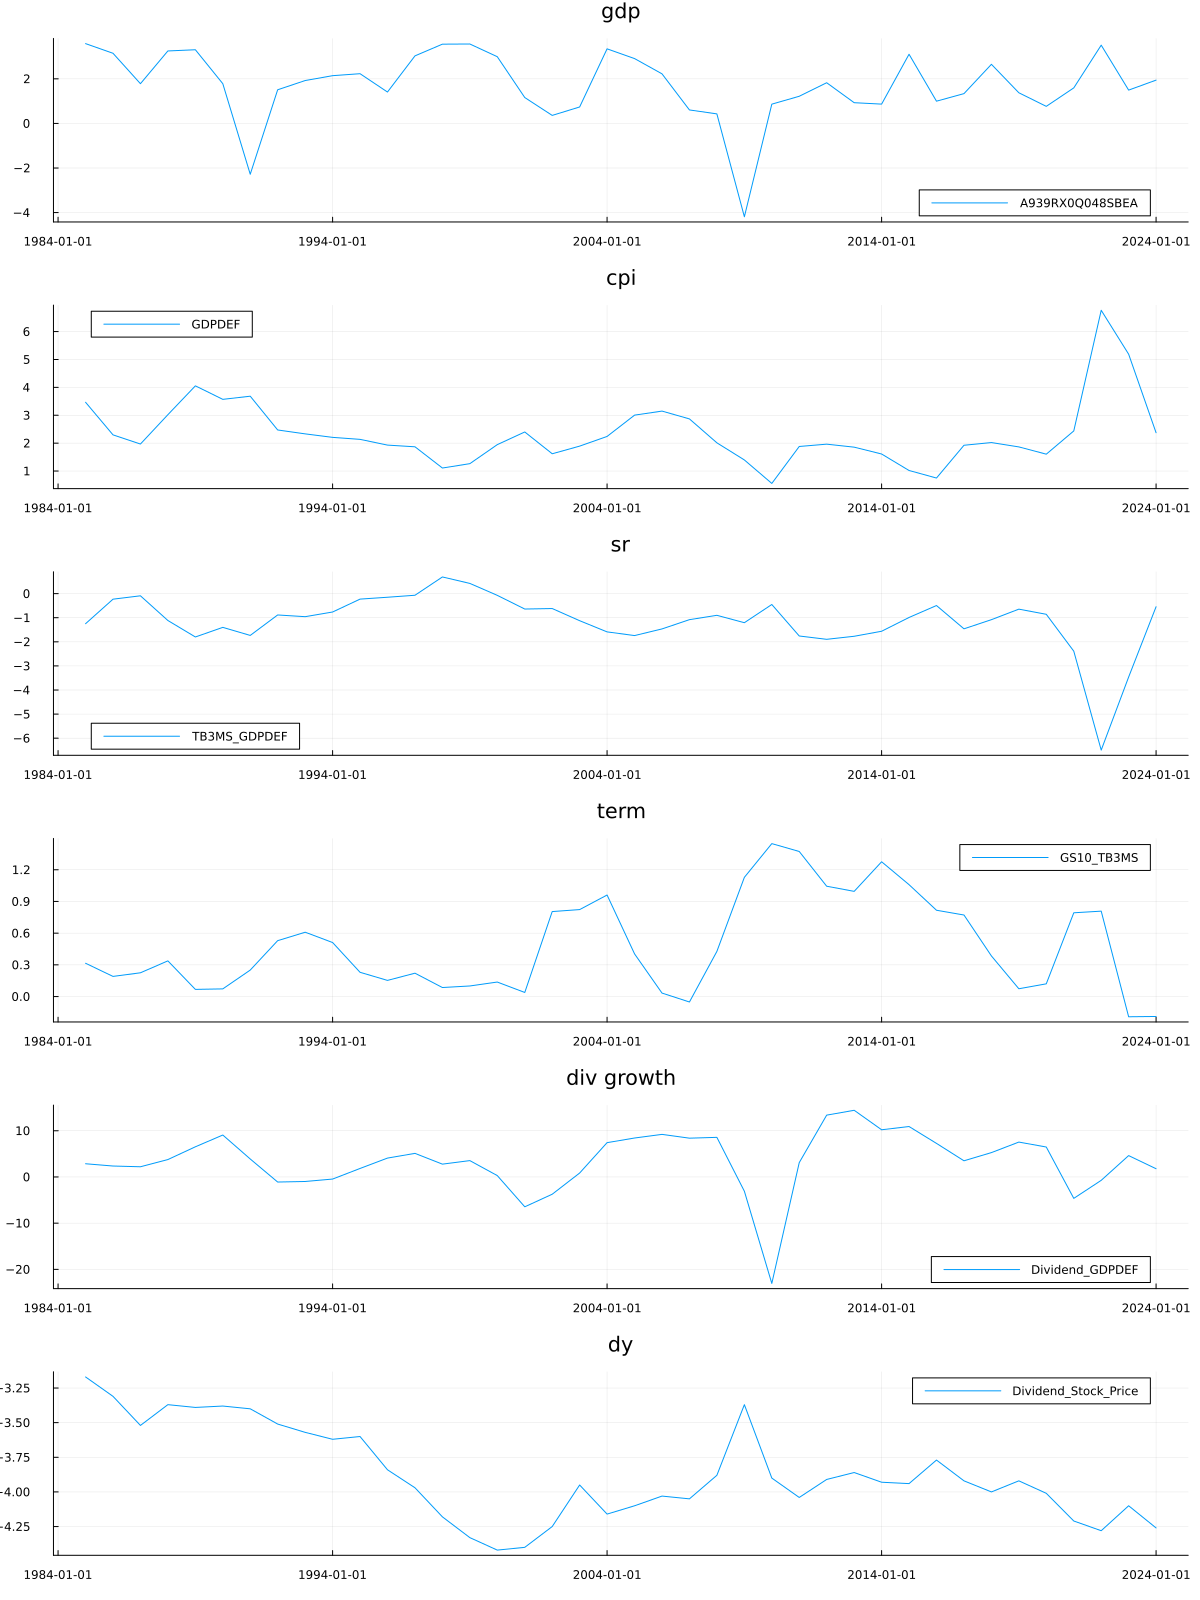

In [51]:
plot(s_data; layout = (6,1), size=(1200,1600), title=["gdp" "cpi" "sr" "term" "div growth" "dy"])

In [52]:
assets_names = colnames(s_data)
T, n_assets = size(s_data)
model = VARModel(s_data)
model_summary(model)

,const,A939RX0Q048SBEA,GDPDEF,TB3MS_GDPDEF,GS10_TB3MS,Dividend_GDPDEF,Dividend_Stock_Price,std
A939RX0Q048SBEA,2.2901,0.3852,-0.0539,0.0582,0.4696,-0.0444,0.3011,1.5021
GDPDEF,4.9181,0.248,-0.4159,-0.9945,-1.1613,-0.058,0.6309,0.8925
TB3MS_GDPDEF,-5.0443,-0.104,1.3716,1.7885,1.4294,0.0504,-0.534,0.9118
GS10_TB3MS,0.8607,-0.1283,-0.1567,-0.0454,0.4474,0.0004,0.017,0.2136
Dividend_GDPDEF,-20.6454,1.9042,3.0822,2.5407,9.387,0.4808,-2.6397,4.8293
Dividend_Stock_Price,-1.6005,0.0051,0.1839,0.1536,0.2896,0.008,0.7047,0.1612


,A939RX0Q048SBEA,GDPDEF,TB3MS_GDPDEF,GS10_TB3MS,Dividend_GDPDEF,Dividend_Stock_Price
A939RX0Q048SBEA,1.0,0.14,0.02,-0.41,0.09,-0.6
GDPDEF,0.14,1.0,-0.95,0.05,0.07,0.12
TB3MS_GDPDEF,0.02,-0.95,1.0,-0.31,-0.12,-0.23
GS10_TB3MS,-0.41,0.05,-0.31,1.0,0.01,0.36
Dividend_GDPDEF,0.09,0.07,-0.12,0.01,1.0,0.15
Dividend_Stock_Price,-0.6,0.12,-0.23,0.36,0.15,1.0


In [53]:
scenarios = simulate(model, 25*freq, 10_000)
periods = [2,6, 16, 26]
ret_in_years = cum_returns_in_periods(scenarios, periods, freq, true)
print_scenarios_summary(ret_in_years, assets_names, string.(periods))

for a in 1:n_assets
    print_scenarios_percentiles(ret_in_years[a, :, :], [.01, 0.025, .05, .25, .5, .75, .95, .975, .99], string.(periods), string.(assets_names[a]))
end  

,A939RX0Q048SBEA,GDPDEF,TB3MS_GDPDEF,GS10_TB3MS,Dividend_GDPDEF,Dividend_Stock_Price
2,1.6898,2.3785,-0.7074,-0.0398,0.5156,-4.2701
6,1.5914,2.3252,-1.0029,0.2692,0.948,-4.2434
16,1.5789,2.3053,-1.2181,0.4299,2.4365,-4.1462
26,1.5703,2.3248,-1.2816,0.4636,2.7263,-4.1103


,A939RX0Q048SBEA,GDPDEF,TB3MS_GDPDEF,GS10_TB3MS,Dividend_GDPDEF,Dividend_Stock_Price
2,0.7472,0.4481,0.4561,0.1079,2.4145,0.0804
6,0.6658,0.6077,0.5186,0.2426,2.9422,0.1501
16,0.4276,0.4321,0.3884,0.1981,2.0967,0.1654
26,0.3374,0.3411,0.3123,0.1614,1.664,0.1503


,A939RX0Q048SBEA,GDPDEF,TB3MS_GDPDEF,GS10_TB3MS,Dividend_GDPDEF,Dividend_Stock_Price
2,-0.0045,-0.0308,0.0085,-0.0295,0.0026,0.0347
6,0.0269,-0.0136,0.0091,0.0221,-0.0033,0.0076
16,0.006,-0.0256,-0.0194,-0.0216,0.0246,0.0032
26,-0.0326,-0.0288,0.0042,-0.0128,-0.0007,0.0241


,A939RX0Q048SBEA,GDPDEF,TB3MS_GDPDEF,GS10_TB3MS,Dividend_GDPDEF,Dividend_Stock_Price
2,0.0179,-0.0668,-0.0756,0.0044,0.0067,0.1249
6,0.0341,0.0906,0.0491,0.1592,0.0607,0.0171
16,-0.069,-0.0344,-0.066,-0.0299,-0.0206,0.0211
26,0.0122,-0.0205,0.0538,0.0112,-0.0662,0.0127


,0.01,0.025,0.05,0.25,0.5,0.75,0.95,0.975,0.99
2,-0.0731,0.2446,0.4627,1.1926,1.6865,2.1907,2.9296,3.1677,3.3939
6,0.0684,0.2972,0.4923,1.1402,1.5826,2.0374,2.6959,2.8995,3.1646
16,0.5793,0.7362,0.8768,1.2896,1.5769,1.8639,2.291,2.4312,2.571
26,0.7894,0.9108,1.0159,1.3409,1.5749,1.7972,2.1252,2.2392,2.3486


,0.01,0.025,0.05,0.25,0.5,0.75,0.95,0.975,0.99
2,1.3372,1.4918,1.635,2.076,2.3816,2.6929,3.1099,3.2482,3.4165
6,0.8892,1.1224,1.3199,1.9289,2.3289,2.7339,3.3077,3.5175,3.7697
16,1.2877,1.4601,1.5997,2.0072,2.3101,2.5959,3.0176,3.1436,3.2917
26,1.5256,1.6601,1.7546,2.0973,2.3245,2.5584,2.884,2.9861,3.105


,0.01,0.025,0.05,0.25,0.5,0.75,0.95,0.975,0.99
2,-1.7487,-1.5973,-1.4542,-1.0239,-0.7098,-0.3934,0.041,0.1812,0.3469
6,-2.2084,-2.0137,-1.8532,-1.356,-0.9967,-0.6546,-0.148,0.0142,0.2204
16,-2.1292,-1.9836,-1.8548,-1.477,-1.2187,-0.9516,-0.5862,-0.4557,-0.3156
26,-2.0035,-1.887,-1.7925,-1.4897,-1.2848,-1.0697,-0.7731,-0.6804,-0.5462


,0.01,0.025,0.05,0.25,0.5,0.75,0.95,0.975,0.99
2,-0.2875,-0.25,-0.2193,-0.1134,-0.0394,0.0331,0.1364,0.1723,0.2055
6,-0.3069,-0.203,-0.1269,0.1054,0.2692,0.4299,0.669,0.7506,0.8431
16,-0.032,0.0411,0.104,0.2948,0.4297,0.5636,0.7555,0.8194,0.8813
26,0.0889,0.1443,0.1977,0.3573,0.4631,0.5727,0.7299,0.7798,0.8389


,0.01,0.025,0.05,0.25,0.5,0.75,0.95,0.975,0.99
2,-5.0772,-4.2525,-3.4545,-1.1032,0.5298,2.1331,4.4926,5.2451,6.1191
6,-5.8696,-4.889,-3.8753,-1.0345,0.9713,2.9214,5.727,6.7494,7.9058
16,-2.4559,-1.6131,-1.0123,1.0331,2.405,3.8334,5.9252,6.5714,7.2828
26,-1.1144,-0.5226,-0.0198,1.602,2.7114,3.8667,5.4526,5.9441,6.696


,0.01,0.025,0.05,0.25,0.5,0.75,0.95,0.975,0.99
2,-4.4583,-4.4281,-4.4025,-4.3242,-4.2704,-4.2173,-4.1372,-4.1115,-4.0756
6,-4.5913,-4.5355,-4.4894,-4.3447,-4.244,-4.1427,-3.9955,-3.9508,-3.8911
16,-4.5354,-4.4675,-4.4144,-4.2584,-4.1456,-4.033,-3.8777,-3.8246,-3.7583
26,-4.4551,-4.4016,-4.3567,-4.2127,-4.1103,-4.0103,-3.8602,-3.8136,-3.759


In [98]:
sr = scenarios[2, :,:] + scenarios[3, :,:] 
lr = scenarios[2, :,:] + scenarios[3, :,:] + scenarios[4, :,:] 
real_Δd = scenarios[2, :,:] + scenarios[5, :,:]
dy = exp.(scenarios[6, :,:])



print_scenarios_percentiles(sr[periods, :], [.01, 0.025, .05, .25, .5, .75, .95, .975, .99], string.(periods), "sr")
print_scenarios_percentiles(lr[periods, :], [.01, 0.025, .05, .25, .5, .75, .95, .975, .99], string.(periods), "lr")
print_scenarios_percentiles(cumsum(real_Δd, dims=1)[periods,:] ./ (periods.-1), [.01, 0.025, .05, .25, .5, .75, .95, .975, .99], string.(periods), "Δd")
print_scenarios_percentiles(dy[periods, :], [.01, 0.025, .05, .25, .5, .75, .95, .975, .99], string.(periods), "dy")



,0.01,0.025,0.05,0.25,0.5,0.75,0.95,0.975,0.99
2,0.8293,0.9426,1.0366,1.3187,1.5119,1.7121,1.9891,2.0723,2.182
6,-0.5355,-0.2809,-0.0657,0.5832,1.0436,1.5019,2.1456,2.3588,2.6147
16,-0.6541,-0.3921,-0.1848,0.4962,0.9634,1.4361,2.1045,2.3119,2.5457
26,-0.6127,-0.3904,-0.1856,0.4914,0.9708,1.456,2.1643,2.3916,2.6371


,0.01,0.025,0.05,0.25,0.5,0.75,0.95,0.975,0.99
2,1.2209,1.2855,1.3385,1.5073,1.6205,1.7364,1.9013,1.9522,2.0218
6,0.7826,0.91,1.0051,1.3134,1.5328,1.7542,2.0615,2.1622,2.2798
16,0.6471,0.7843,0.8957,1.2375,1.4806,1.7166,2.0593,2.1815,2.3161
26,0.6735,0.801,0.9051,1.2443,1.4964,1.7387,2.0897,2.1981,2.3282


,0.01,0.025,0.05,0.25,0.5,0.75,0.95,0.975,0.99
2,-5.651,-3.9587,-2.4149,2.4624,5.7655,9.1387,14.007,15.6818,17.3187
6,-4.2727,-3.0691,-1.9531,1.5469,3.9437,6.3237,9.6775,10.9576,12.2504
16,0.0676,0.8232,1.5154,3.585,5.0215,6.5117,8.6456,9.2736,10.0409
26,1.3825,2.0268,2.5067,4.1274,5.2506,6.3853,7.9689,8.544,9.1558


,0.01,0.025,0.05,0.25,0.5,0.75,0.95,0.975,0.99
2,0.0095,0.0101,0.0106,0.0124,0.0138,0.0154,0.0181,0.019,0.0204
6,0.0082,0.0091,0.0099,0.0129,0.0155,0.0185,0.024,0.0258,0.0285
16,0.0085,0.0095,0.0104,0.014,0.0172,0.021,0.0281,0.0309,0.0349
26,0.0088,0.0098,0.0107,0.0144,0.0175,0.0214,0.0286,0.0316,0.0351


In [152]:
real_Δd[1,:] .= 1.

div_index =values(data_source[:Dividend][end])[1] .* exp.(cumsum(real_Δd, dims=1) ./100)
price_index = div_index ./ dy

eq_ret = log.((price_index[2:end,:] .+ div_index[2:end,:] ) ./ price_index[1:end-1,:])
eq_cum_ret = cumsum(eq_ret, dims=1)[[1, 5, 10, 25],:] ./ [1, 5, 10, 25]
real_eq_ret = eq_ret .- (scenarios[2, 2:end, :] ./100)
real_eq_cum_ret = cumsum(real_eq_ret, dims=1)[[1, 5, 10, 25],:] ./ [1, 5, 10, 25]

print_scenarios_percentiles(eq_cum_ret, [.01, 0.025, .05, .25, .5, .75, .95, .975, .99], string.([1, 5, 10, 25]), "equity return")
print_scenarios_percentiles(real_eq_cum_ret, [.01, 0.025, .05, .25, .5, .75, .95, .975, .99], string.([1, 5, 10, 25]), "equity real return")

,0.01,0.025,0.05,0.25,0.5,0.75,0.95,0.975,0.99
1,-0.3271,-0.2664,-0.2084,-0.0538,0.052,0.1565,0.307,0.363,0.4255
5,-0.0993,-0.0786,-0.0632,-0.0091,0.0275,0.0648,0.1197,0.1385,0.157
10,-0.0386,-0.0267,-0.0149,0.018,0.0411,0.0653,0.0978,0.1087,0.1227
25,0.0143,0.0212,0.0274,0.0461,0.0594,0.0723,0.0912,0.0978,0.105


,0.01,0.025,0.05,0.25,0.5,0.75,0.95,0.975,0.99
1,-0.3517,-0.2899,-0.2333,-0.0781,0.0285,0.1332,0.2845,0.3389,0.4049
5,-0.1238,-0.1047,-0.0874,-0.0334,0.0046,0.0421,0.0993,0.118,0.139
10,-0.0641,-0.0515,-0.0395,-0.0056,0.0181,0.0433,0.0768,0.0881,0.103
25,-0.0115,-0.0032,0.0032,0.0225,0.0362,0.0496,0.0693,0.0756,0.0838


In [150]:
mdd, mddl = max_drawdown_and_length(real_eq_ret)

display("real equity")
display("mdd")
display(quantile(mdd, [.03, .25, .5, .75, .97])')
display("mddl")
display(quantile(mddl, [.03, .25, .5, .75, .97])')

"real equity"

"mdd"

1×5 adjoint(::Vector{Float64}) with eltype Float64:
 0.213619  0.323601  0.39887  0.48261  0.628032

"mddl"

1×5 adjoint(::Vector{Float64}) with eltype Float64:
 4.0  7.0  10.0  13.0  21.0